## Evaluation metrics

*When we have an equal number of positive and negative samples in a binary classification metric, we generally use accuracy, precision, recall and f1.*

**Accuracy:** It is one of the most straightforward metrics used in machine learning. It defines how accurate your model is. For the problem described above, if you build a model that classifies 90 images accurately, your accuracy is 90% or 0.90. If only 83 images are classified correctly, the accuracy of your model is 83% or 0.83. Simple.

Python code for calculating accuracy is also quite simple.

In [1]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

We can also calculate accuracy using scikit-learn.

In [2]:
from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

metrics.accuracy_score(l1, l2)

0.625

**True positive (TP)**: Given an image, if your model predicts the image has pneumothorax, and the actual target for that image has pneumothorax, it is considered a true positive.

**True negative (TN):** Given an image, if your model predicts that the image does not have pneumothorax and the actual target says that it is a non-pneumothorax image, it is considered a true negative.

**False positive (FP):** Given an image, if your model predicts pneumothorax and the actual target for that image is non-pneumothorax, it a false positive.

**False negative (FN):** Given an image, if your model predicts non-pneumothorax and the actual target for that image is pneumothorax, it is a false negative.

Let’s look at implementations of these, one at a time.

In [3]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

The way I have implemented these here is quite simple and works only for binary classification. Let’s check these functions.

In [4]:
true_positive(l1, l2)

2

In [5]:
false_positive(l1, l2)

1

In [6]:
false_negative(l1, l2)

2

In [7]:
true_negative(l1, l2)

3

If we have to define accuracy using the terms described above, we can write:

*Accuracy Score = (TP + TN) / (TP + TN + FP + FN)*

We can now quickly implement accuracy score using TP, TN, FP and FN in python. Let’s call it *accuracy_v2*.

In [8]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

We can quickly check the correctness of this function by comparing it to our previous implementation and scikit-learn version.

In [9]:
accuracy(l1, l2)

0.625

In [10]:
accuracy_v2(l1, l2)

0.625

In [11]:
metrics.accuracy_score(l1, l2)

0.625

**Precision** is defined as:

*Precision = TP / (TP + FP)*

Now, since we have implemented TP, TN, FP and FN, we can easily implement precision in python.

In [12]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

Let’s try this implementation of precision.

In [13]:
precision(l1, l2)

0.6666666666666666

Next, we come to recall. Recall is defined as:

*Recall = TP / (TP + FN)*

In [14]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In the case of our two small lists, we should have a recall of 0.5. Let’s check.

In [15]:
recall(l1, l2)

0.5

Before looking into the precision-recall curve, let’s assume two lists.

In [16]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937,  0.0191491,  0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377,   0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

So, y_true is our targets, and y_pred is the probability values for a sample being assigned a value of 1. So, now, we look at probabilities in prediction instead of the predicted value (which is most of the time calculated with a threshold at 0.5).

In [17]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Now, we can plot these values of precisions and recalls.

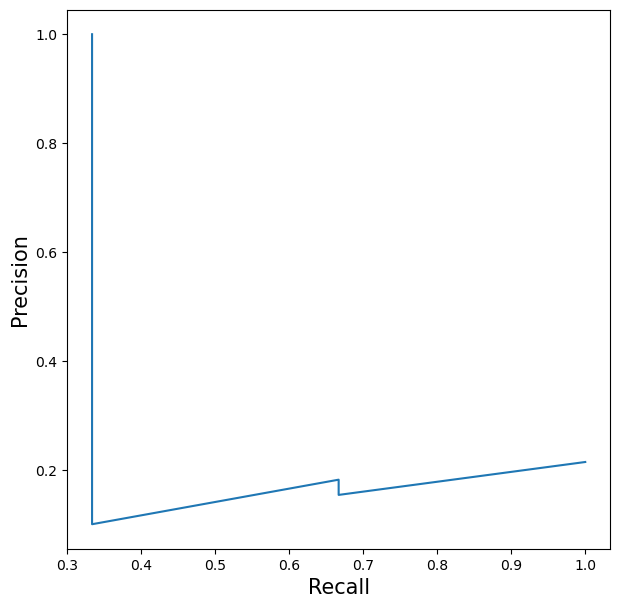

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.show()

This **precision-recall curve** looks very different from what you might have seen on the internet. It’s because we had only 20 samples, and only 3 of them were positive samples. But there’s nothing to worry. It’s the same old precision-recall curve.

F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall. If we denote precision using P and recall using R, we can represent the F1 score as:

*F1 = 2PR / (P + R)*

A little bit of mathematics will lead you to the following equation of F1 based on TP, FP and FN

*F1 = 2TP / (2TP + FP + FN)*

A Python implementation is simple because we have already implemented these.

In [19]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    score = 2 * p * r / (p + r)

    return score

Let’s see the results of this and compare it with scikit-learn.

In [20]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

And from scikit learn for the same lists, we get:

In [21]:
metrics.f1_score(y_true, y_pred)

0.5714285714285715

The first one is **TPR or True Positive Rate**, which is the same as recall.

*TPR = TP / (TP + FN)*

Even though it is same as recall, we will make a python function for it for further use with this name.

In [22]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

TPR or recall is also known as **sensitivity**.

And **FPR or False Positive Rate**, which is defined as:

*FPR = FP / (TN + FP)*

In [23]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

And **1 - FPR** is known as **specificity or True Negative Rate or TNR**.

In [24]:
# empty lists to store tpr
# and fpr values
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [25]:
import pandas as pd

pd.DataFrame.from_dict({
    "threshold": thresholds,
    "tpr": tpr_list,
    "fpr": fpr_list,
})

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


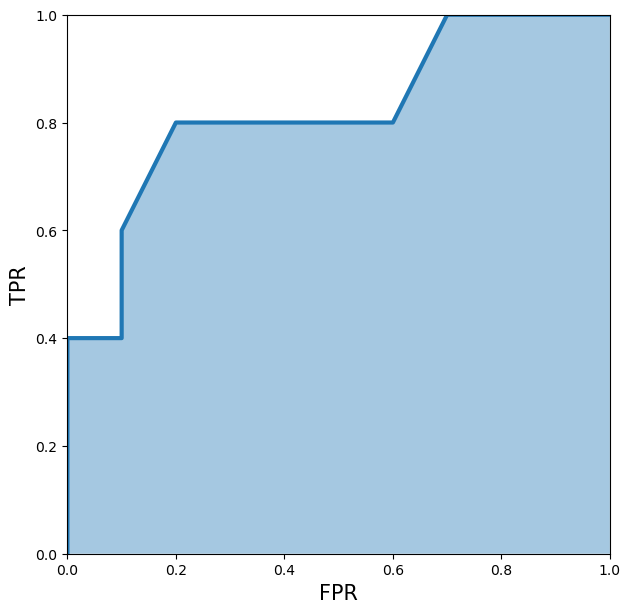

In [26]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the **Receiver Operating Characteristic (ROC)**. And if we calculate the area under this ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets.

This metric is known as the **Area Under ROC Curve** or **Area Under Curve** or just simply **AUC**. There are many ways to calculate the area under the ROC curve. For this particular purpose, we will stick to the fantastic implementation by scikit- learn.

In [27]:
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

Let’s see how these thresholds impact true positive and false positive values.

In [28]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [29]:
pd.DataFrame.from_dict({
    "threshold": thresholds,
    "tp": tp_list,
    "fp": fp_list,
})

,threshold,tp,fp
0,0.00,5,10
1,0.10,5,9
2,0.20,5,7
3,0.30,4,6
4,0.40,4,3
5,0.50,4,3
6,0.60,4,2
7,0.70,3,1
8,0.80,3,1
9,0.85,2,1


In case of a binary classification problem, we define **log loss** as:

*Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )*

Where target is either 0 or 1 and prediction is a probability of a sample belonging to class 1.

In [30]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store
    # individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think about it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
        # add to loss list
        loss.append(temp_loss)
    # return mean loss over all samples
    return np.mean(loss)

Let’s test our implementation:

In [31]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

0.49882711861432294

We can compare this with scikit-learn:

In [32]:
metrics.log_loss(y_true, y_proba)

0.49882711861432294

Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a **multi-class classification** problem.

There are three different ways to calculate this which might get confusing from time to time. Let’s assume we are interested in precision first. We know that precision depends on true positives and false positives.

- **Macro averaged precision:** calculate precision for all classes individually and then average them
- **Micro averaged precision:** calculate class wise true positive and false positive and then use that to calculate overall precision
- **Weighted precision:** same as macro but in this case, it is weighted average depending on the number of items in each class

This seems complicated but is easy to understand by python implementations. Let’s see how macro-averaged precision is implemented.

In [33]:
def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro precision score
    """
    
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))

    # initialize precision to 0
    precision = 0

    # loop over all classes
    for class_ in range(num_classes):

        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)

        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)

        # calculate precision for current class
        temp_precision = tp / (tp + fp)

        # keep adding precision for all classes
        precision += temp_precision

    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

You will notice that it wasn’t so difficult. Similarly, we have micro-averaged precision score.

In [34]:
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro precision score
    """

    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))

    # initialize tp and fp to 0
    tp = 0
    fp = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)

        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)

    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

This isn’t difficult, either. Then what is?

Nothing. Machine learning is easy. Now, let’s look at the implementation of weighted precision.

In [35]:
from collections import Counter

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """

    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))

    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)

    # initialize precision to 0
    precision = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)

        # calculate precision of class
        temp_precision = tp / (tp + fp)

        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision

        # add to overall precision
        precision += weighted_precision
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

Let’s compare our implementations with scikit-learn to know if we implemented it right.

In [36]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [37]:
macro_precision(y_true, y_pred)

0.3611111111111111

In [38]:
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111

In [39]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [40]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

In [41]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [42]:
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814

Similarly, we can implement the **recall metric for multi-class**. Precision and recall depend on true positive, false positive and false negative while F1 depends on precision and recall.

Implementation for recall is left as an exercise for the reader and one version of F1 for multi-class, i.e., weighted average is implemented here.

In [43]:
def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1 score
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted f1 score
    """

    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))

    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)

    # initialize f1 to 0
    f1 = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)

        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0

        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1

        # add to f1 precision
        f1 += weighted_f1

    # calculate overall F1 by dividing by
    # total number of samples
    overall_f1 = f1 / len(y_true)
    return overall_f1

Note that there are a few lines of code above which are new. And that’s why you should read the code carefully.

In [44]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [45]:
weighted_f1(y_true, y_pred)

0.41269841269841273

In [46]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

**Confusion matrix** gives an easy way to calculate different metrics that we have discussed before. Scikit-learn offers an easy and straightforward way to generate a confusion matrix. Please note that the confusion matrix that I have shown in figure 8 is a transpose of scikit-learn’s confusion matrix and an original version can be plotted by the following code.

In [47]:
import seaborn as sns

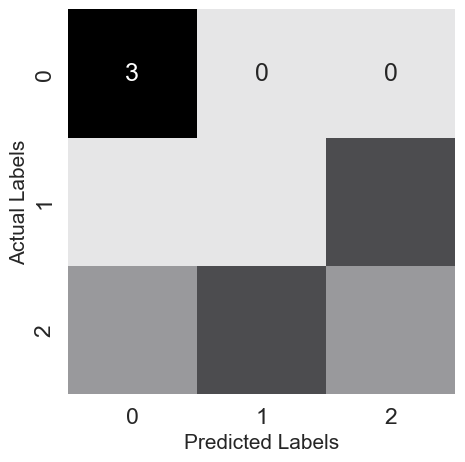

In [48]:
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=15)
plt.show()

The metrics for multi-label classification problem are a bit different. Some suitable and most common metrics are:

- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)
- Log loss

Let’s start with **precision at k or P@k**. One must not confuse this precision with the precision discussed earlier. If you have a list of original classes for a given sample and list of predicted classes for the same, precision is defined as the number of hits in the predicted list considering only top-k predictions, divided by k.

If that’s confusing, it will become apparent with python code.

In [49]:
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: precision at a given value k
    """
    # if k is 0, return 0. we should never have this
    # as k is always >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    # convert predictions to set
    pred_set = set(y_pred)
    # convert actual values to set
    true_set = set(y_true)
    # find common values
    common_values = pred_set.intersection(true_set)
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

Now, we have **average precision at k or AP@k**. AP@k is calculated using P@k. For example, if we have to calculate AP@3, we calculate P@1, P@2 and P@3 and then divide the sum by 3.

Let’s see its implementation.

In [50]:
def apk(y_true, y_pred, k):
    """
    This function calculates average precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: average precision at a given value k
    """
    # initialize p@k list of values
    pk_values = []
    # loop over all k. from 1 to k + 1
    for i in range(1, k + 1):
        # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))

    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

These two functions can be used to calculate average precision at k (AP@k) for two given lists; let’s see how.

In [51]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

for i in range(len(y_true[:1])):
    for j in range(1, 4):
        print(
            f"""
            y_true={y_true[i]},
            y_pred={y_pred[i]},
            AP@{j}={apk(y_true[i], y_pred[i], k=j)}
            """
        )


            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@1=0.0
            

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@2=0.25
            

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@3=0.38888888888888884
            


In machine learning, we are interested in all samples, and that’s why we have **mean average precision at k or MAP@k**. MAP@k is just an average of AP@k and can be calculated easily by the following python code.

In [52]:
def mapk(y_true, y_pred, k):
    """
    This function calculates mean avg precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean avg precision at a given value k
    """
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(
            apk(y_true[i], y_pred[i], k=k)
        )
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

Now, we can calculate MAP@k for k=1, 2, 3 and 4 for the same list of lists.

In [53]:
mapk(y_true, y_pred, k=1)

0.3333333333333333

In [54]:
mapk(y_true, y_pred, k=2)

0.375

In [55]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [56]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

P@k, AP@k and MAP@k all range from 0 to 1 with 1 being the best.

Please note that sometimes you might see different implementations of P@k and AP@k on the internet. For example, let’s take a look at one of these implementations.

In [57]:
# taken from:
# https://github.com/benhamner/Metrics/blob/
# master/Python/ml_metrics/average_precision.py

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the AP at k between two lists of
    items.
    Parameters
    ----------
    actual : list
                A list of elements to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
                The maximum number of predicted elements
    Returns
    -------
    score : double
                The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]
    
    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

We have now reached a stage where we can say that we now know all binary, multi- class and multi-label classification metrics, and now we can move to regression metrics.

The most common metric in regression is error. **Error** is simple and very easy to understand.

*Error = True Value – Predicted Value*

**Absolute error** is just absolute of the above.

*Absolute Error = Abs ( True Value – Predicted Value )*

Then we have **mean absolute error (MAE)**. It’s just mean of all absolute errors.

In [58]:
def mean_absolute_error(y_true, y_pred):
    """
    This function calculates mae
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate absolute error
        # and add to error
        error += np.abs(yt - yp)
    # return mean error
    return error / len(y_true)

Similarly, we have squared error and **mean squared error (MSE)**.

*Squared Error = ( True Value – Predicted Value )^2*

And mean squared error (MSE) can be implemented as follows.

In [59]:
def mean_squared_error(y_true, y_pred):
    """
    This function calculates mse
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
    # return mean error
    return error / len(y_true)

MSE and **RMSE (root mean squared error)** are the most popular metrics used in evaluating regression models.

*RMSE = SQRT ( MSE )*

Another type of error in same class is **squared logarithmic error**. Some people call it **SLE**, and when we take mean of this error across all samples, it is known as **MSLE (mean squared logarithmic error)** and implemented as follows.

In [60]:
def mean_squared_log_error(y_true, y_pred):
    """
    This function calculates msle
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared logarithmic error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error
        # and add to error
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    # return mean error
    return error / len(y_true)

**Root mean squared logarithmic error** is just a square root of this. It is also known as **RMSLE**.

Then we have the percentage error:

*Percentage Error = ( ( True Value – Predicted Value ) / True Value ) * 100*

Same can be converted to mean percentage error for all samples.

In [61]:
def mean_percentage_error(y_true, y_pred):
    """
    This function calculates mpe
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean percentage error
    """
    # initialize error at 0
    error = 0
    
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += (yt - yp) / yt
    
    # return mean percentage error
    return error / len(y_true)

And an absolute version of the same (and more common version) is known as **mean absolute percentage error or MAPE**.

In [62]:
def mean_abs_percentage_error(y_true, y_pred):
    """
    This function calculates MAPE
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute percentage error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += np.abs(yt - yp) / yt
    # return mean percentage error
    return error / len(y_true)

Let’s talk about another regression metric known as **$R^2 (R-squared)$**, also known as the **coefficient of determination**.

In simple words, R-squared says how good your model fits the data. R-squared closer to 1.0 says that the model fits the data quite well, whereas closer 0 means that model isn’t that good. R-squared can also be negative when the model just makes absurd predictions.

$$
R^2 = 1 - \frac{\sum_{i=1}^{N}(y_{ti}-y_{pi})^2}{\sum_{i=1}^{N}(y_{ti}-y_{t mean})}
$$

In [63]:
def r2(y_true, y_pred):
    """
    This function calculates r-squared score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: r2 score
    """
    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)

    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0

    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
    # calculate the ratio
    ratio = numerator / denominator
    # return 1 - ratio
    return 1 - ratio

You can make most of them in a very efficient way by properly using numpy. For example, take a look at the implementation of mean absolute error without any loops.

In [64]:
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

Then, there are some advanced metrics.

One of them which is quite widely used is **quadratic weighted kappa**, also known as QWK. It is also known as **Cohen’s kappa**. QWK measures the “agreement” between two “ratings”. The ratings can be any real numbers in 0 to N. And predictions are also in the same range. An agreement can be defined as how close these ratings are to each other. So, it’s suitable for a classification problem with N different categories/classes. If the agreement is high, the score is closer towards 1.0. In the case of low agreement, the score is close to 0. Cohen’s kappa has a good implementation in scikit-learn, and detailed discussion of this metric is beyond the scope of this book.

In [65]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]

y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

In [66]:
metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")

0.33333333333333337

In [67]:
metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

You can see that even though accuracy is high, QWK is less. A QWK greater than 0.85 is considered to be very good!

An important metric is **Matthew’s Correlation Coefficient (MCC)**. MCC ranges from -1 to 1. 1 is perfect prediction, -1 is imperfect prediction, and 0 is random prediction. The formula for MCC is quite simple.

$$
MCC = \frac{TP * TN - FP * FN}{[ (TP + FP) * (FN + TN) * (FP + TN) * (TP + FN) ] ^ (0.5)}
$$

We see that MCC takes into consideration TP, FP, TN and FN and thus can be used for problems where classes are skewed. You can quickly implement it in python by using what we have already implemented.

In [68]:
def mcc(y_true, y_pred):
    """
    This function calculates Matthew's Correlation Coefficient
    for binary classification.
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: mcc score
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)

    numerator = (tp * tn) - (fp * fn)

    denominator = ((tp + fp) * (fn + tn) * (fp + tn) * (tp + fn))

    denominator = denominator ** 0.5

    return numerator / denominator